In [1]:
# %load ../init_setup/setup.py
# ==- INITIAL SETUP -===============================================================================
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ipywidgets import interact

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('seaborn-whitegrid')

# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)

# ==- COLOR PALETTE -===============================================================================
c_red = "#e6194b" # red
c_gre = "#3cb44b" # green
c_yel = "#ffe119" # yellow
c_blu = "#4363d8" # blue
c_ora = "#f58231" # orange
c_pur = "#911eb4" # purple
c_cya = "#42d4f4" # cyan
c_mag = "#f032e6" # magenta
c_lim = "#bfef45" # lime
c_pin = "#fabebe" # pink
c_tea = "#469990" # teal
c_lav = "#e6beff" # lavender
c_bro = "#9A6324" # brown
c_bei = "#fffac8" # beige
c_mar = "#800000" # maroon
c_min = "#aaffc3" # mint
c_oli = "#808000" # olive
c_apr = "#ffd8b1" # apricot
c_nav = "#000075" # navy
c_gra = "#a9a9a9" # gray
c_whi = "#ffffff" # white
c_bla = "#000000" # black

accessibility_95    = [c_red, c_gre, c_blu, c_yel, c_ora, c_pur, c_cya,
                       c_mag, c_lim, c_pin, c_tea, c_lav, c_bro, c_bei,
                       c_mar, c_min, c_oli, c_apr, c_nav, c_gra, c_bla]
accessibility_99    = [c_red, c_gre, c_blu, c_yel, c_ora, c_cya, c_mag,
                       c_pin, c_tea, c_lav, c_bro, c_bei, c_mar, c_min,
                       c_nav, c_gra, c_bla]
accessibility_99_99 = [c_blu, c_yel, c_ora, c_pin, c_lav, c_mar, c_nav,
                       c_gra, c_bla]
accessibility_100   = [c_blu, c_yel, c_gra, c_bla]


In [2]:
# %load ../init_setup/setup2
matplotlib.rcParams.update({'font.size': 16})


In [3]:
# ==- SPECIAL GRADIENTS -===========================================================================
grad_9_red = np.array([c_red, "#ea4c6e", "#eb5c77", "#ed6e81", "#ef7e8d", "#f09099", "#f1a1a6", "#f2b3b5", c_pin])
grad_7_red = np.array([c_red, "#e93258", "#ed4d67", "#f06879", "#f3848d", "#f6a0a4", c_pin])
grad_7_gre = np.array([c_gre, "#4bc15d", "#5bcd70", "#6cda84", "#80e698", "#94f3ad", c_min])
grad_6_red = np.array([c_red, "#ea385b", "#ee586e", "#f27985", "#f69b9f", c_pin])
grad_6_gre = np.array([c_gre, "#4ec360", "#62d277", "#78e18f", "#90f0a9", c_min])
grad_4_red = np.array([c_red, "#ec4d67", "#f3848e", c_pin])
grad_4_gre = np.array([c_gre, "#5ccd70", "#80e698", c_min])

# Engines Plots
### Final Engines Plot Improvements (Introduction)

In [37]:
# Attach a text label above each bar in rects displaying its height
def autolabel(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{}".format(height),
                    xy         = (rect.get_x() + rect.get_width() / 2, height),
                    xytext     = (0, 3), # 3 points vertical offset
                    textcoords = "offset points",
                    ha = "center", va="bottom")

def v_engines_barplot(rect_labels, y, colors, category_labels, xlabel, ylabel, title):
    xarr = np.arange(len(rect_labels))
    width = 0.35
    
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    rects1 = ax.bar(xarr - width/2, y[0], width, color=colors[0], label = category_labels[0])
    rects2 = ax.bar(xarr + width/2, y[1], width, color=colors[1], label = category_labels[1])
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks(xarr)
    ax.set_xticklabels(rect_labels)
    ax.legend()
    
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    
    fig.tight_layout()
    
    plt.show()
    return

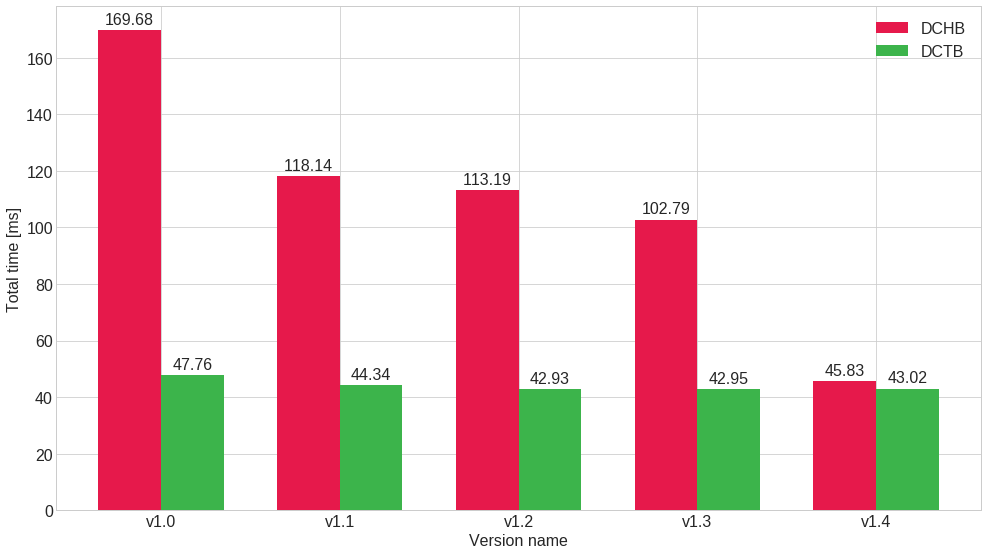

In [38]:
engines  = ["DCHB", "DCTB"]
versions = ["v1.0", "v1.1", "v1.2", "v1.3", "v1.4"]
times    = [[169.68, 118.14, 113.19, 102.79, 45.83], [47.76, 44.34, 42.93, 42.95, 43.02]]

v_engines_barplot(versions, times, [c_red, c_gre], engines, "Version name", "Total time [ms]", "Total DCHB and DCTB times")

### Initial CLAS12 State (Problem Definition)

In [18]:
# TODO: ADD THE TOTAL TIME AS TEXT TO THE RIGHT OF EACH BAR!
def h_enginesplot(x, y, colors, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    y_pos = np.arange(len(x))
    plt.barh(y_pos, y, color=colors, align='center')

    # plt.ylabel(xlabel)
    plt.yticks(y_pos, x)
    
    plt.xlabel(ylabel)
    plt.xticks(np.arange(0, 71, 10))

    plt.title(title)

    plt.tight_layout()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

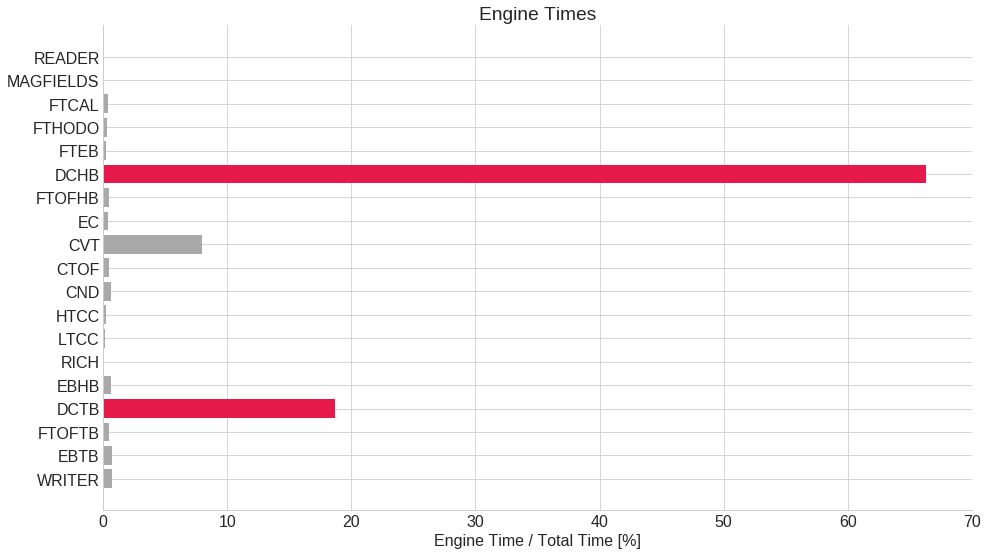

In [17]:
# 20180907
names = [
    "READER"    , "MAGFIELDS" , "FTCAL"     , "FTHODO"    ,
    "FTEB"      , "DCHB"      , "FTOFHB"    , "EC"        ,
    "CVT"       , "CTOF"      , "CND"       , "HTCC"      ,
    "LTCC"      , "RICH"      , "EBHB"      , "DCTB"      ,
    "FTOFTB"    , "EBTB"      , "WRITER"
]
times = np.array([0.04,   0.01, 0.90,  0.87, 
                  0.64, 169.68, 1.15,  1.00, 
                  20.35,   1.25, 1.58,  0.57, 
                  0.30,    0.14, 1.63, 47.76, 
                  1.18, 1.83, 1.89])/2.5598
colors = [c_gra, c_gra, c_gra, c_gra,
          c_gra, c_red, c_gra, c_gra,
          c_gra, c_gra, c_gra, c_gra,
          c_gra, c_gra, c_gra, c_red,
          c_gra, c_gra, c_gra]

h_enginesplot(names[::-1], times[::-1], colors[::-1], "Engine Name", "Engine Time / Total Time [%]", "Engine Times")

# Methods Times

In [20]:
def autolabel(ax, rects, vertical=False):
    if (vertical): rot = 270
    else:          rot = 0
        
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=rot)
    return

def methods_plot(names, times, colors):
    x = np.arange(len(names))
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)

    rects = plt.bar(x, times, color=colors, align="center", alpha=baralpha, label=names)
    autolabel(ax, rects)

#     plt.xlabel("Method")
    plt.ylabel("CPU time [s]")
    plt.title("CPU time per method (10.000 events)")
    
    plt.tight_layout()
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names, rotation = -30, ha="left")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color=c_gra, linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()
    return

def methods_contrast_plot(names, times, colors, labels, vertical=True):
    width = 0.35
    x = np.arange(len(names))
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    if not vertical:
        for i in range(len(colors[0])):
            colors[0][i] = colors[0][len(colors[0])-1]
            colors[1][i] = colors[1][len(colors[1])-1]
            
    
    rects_arr = []
    rects_arr.append(ax.bar(x - width/2, times[0], width, label=labels[0], color=colors[0]))
    rects_arr.append(ax.bar(x + width/2, times[1], width, label=labels[1], color=colors[1]))
    for rects in rects_arr:
        autolabel(ax, rects, vertical)
    
#     ax.set_xlabel("Method")
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names, rotation = -30, ha="left")
    ax.set_ylabel("CPU time [s]")
    ax.set_title("CPU time per method (10.000 events)")
    
    plt.tight_layout()
    plt.legend()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(color=c_gra, linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()
    return

### Initial Method Times (Profiling Results)

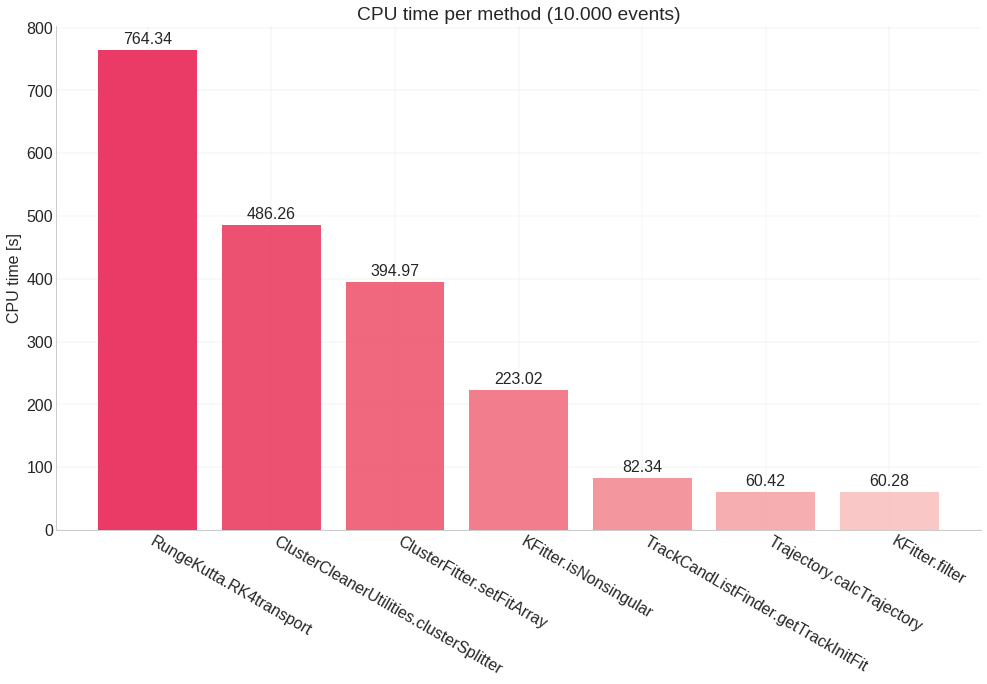

In [38]:
names = [
    "RungeKutta.RK4transport",
    "ClusterCleanerUtilities.clusterSplitter",
    "ClusterFitter.setFitArray",
    "KFitter.isNonsingular",
    "TrackCandListFinder.getTrackInitFit",
    "Trajectory.calcTrajectory",
    "KFitter.filter",
]
times = [764.34, 486.26, 394.97, 223.02,  82.34,  60.42,  60.28]

methods_plot(names, times, grad_7_red)

### Runge Kutta 4 Composition (Magnetic Field Interpolation)

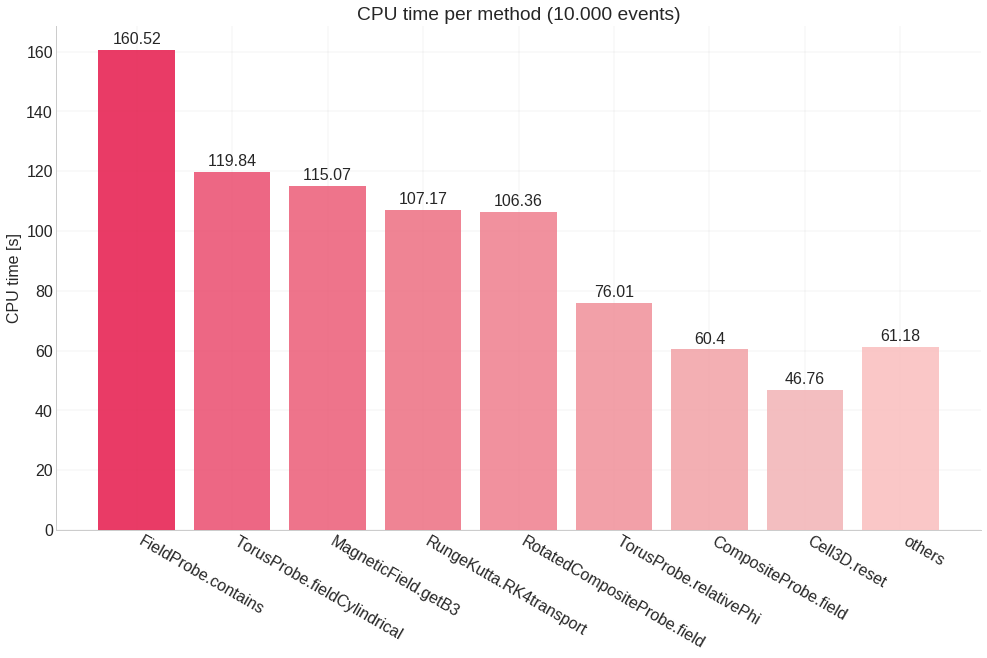

In [39]:
names = [
    "FieldProbe.contains",
    "TorusProbe.fieldCylindrical",
    "MagneticField.getB3",
    "RungeKutta.RK4transport",
    "RotatedCompositeProbe.field",
    "TorusProbe.relativePhi",
    "CompositeProbe.field",
    "Cell3D.reset",
    "others"
]
times = [160.52, 119.84, 115.07, 107.17, 106.36, 76.01, 60.40, 46.76, 61.18]

methods_plot(names, times, grad_9_red)

### v1.1 vs v1.0 (Refactoring and Optimizations)

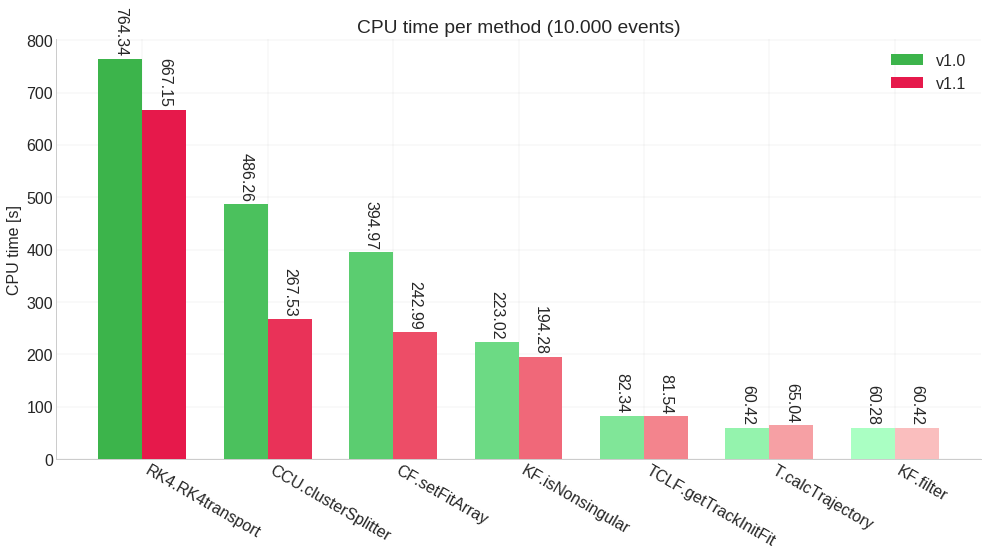

In [11]:
methods = ["RK4.RK4transport",
           "CCU.clusterSplitter",
           "CF.setFitArray",
           "KF.isNonsingular",
           "TCLF.getTrackInitFit",
           "T.calcTrajectory",
           "KF.filter"
          ]                     
old_time = np.array([764.34, 486.26, 394.97, 223.02,  82.34,  60.42,  60.28])
new_time = np.array([667.15, 267.53, 242.99, 194.28,  81.54,  65.04,  60.42])

methods_contrast_plot(methods, (old_time, new_time), (grad_7_gre, grad_7_red), ("v1.0", "v1.1"))

### v1.2 vs v1.1 (Matrices Handling Changes)

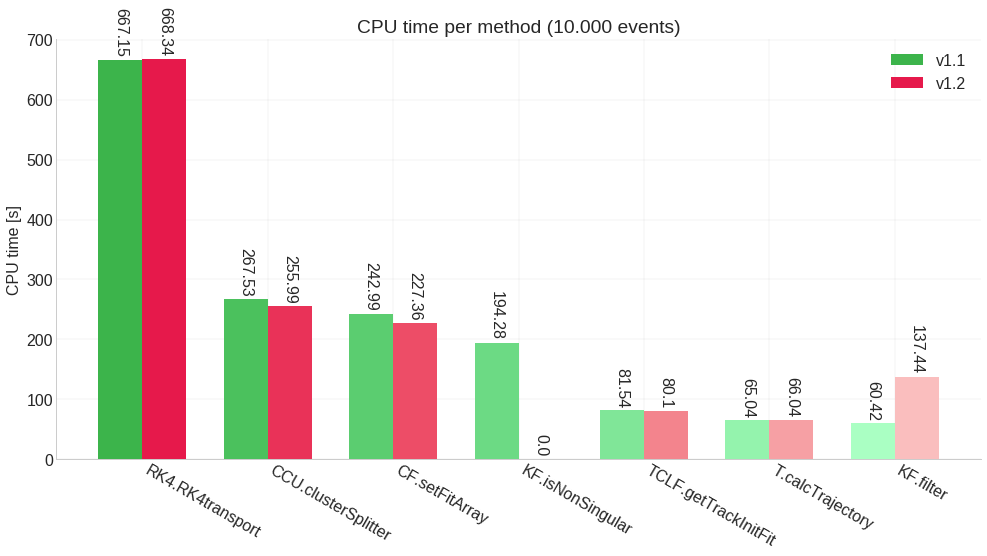

In [41]:
methods = ["RK4.RK4transport",
           "CCU.clusterSplitter",
           "CF.setFitArray",
           "KF.isNonSingular",
           "TCLF.getTrackInitFit",
           "T.calcTrajectory",
           "KF.filter"
          ]
old_time = np.array([667.15, 267.53, 242.99, 194.28,  81.54,   65.04,  60.42])
new_time = np.array([668.34, 255.99, 227.36, 0,       80.10,   66.04, 137.44])

methods_contrast_plot(methods, (old_time, new_time), (grad_7_gre, grad_7_red), ("v1.1", "v1.2"))

### v1.3 vs v1.2 (Magnetic Field Interpolation)

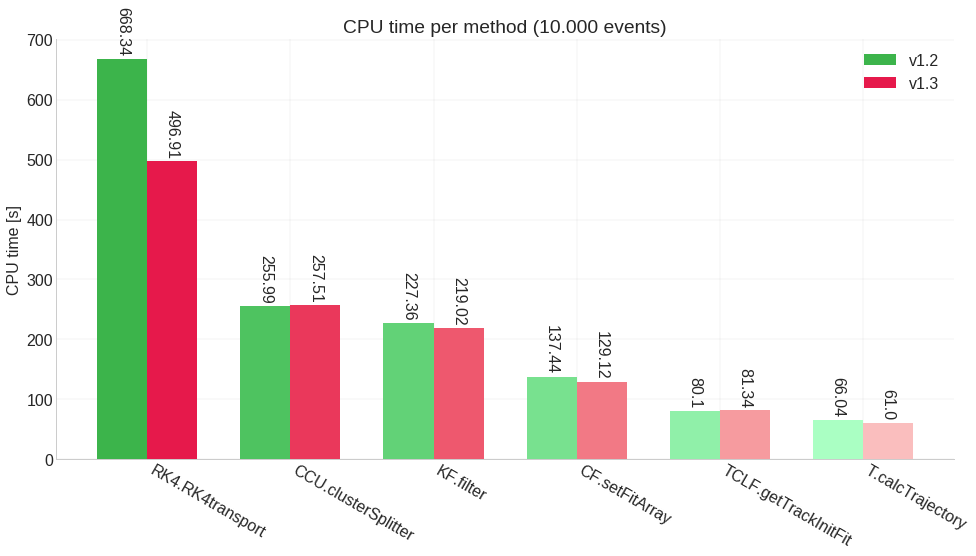

In [42]:
methods = ["RK4.RK4transport",
           "CCU.clusterSplitter",
           "KF.filter",
           "CF.setFitArray",
           "TCLF.getTrackInitFit",
           "T.calcTrajectory"
          ]
old_time = np.array([668.34, 255.99, 227.36, 137.44,  80.10,   66.04])
new_time = np.array([496.91, 257.51, 219.02, 129.12,  81.34,   61.00])

methods_contrast_plot(methods, (old_time, new_time), (grad_6_gre, grad_6_red), ("v1.2", "v1.3"))

### v1.4 vs v1.3 (Adams-Bashforth-Moulton Method)

In [ ]:
# Press F to pay respects

### v1.4.a + v1.4.b (Multithreaded Cluster and Track Finding Algorithms)

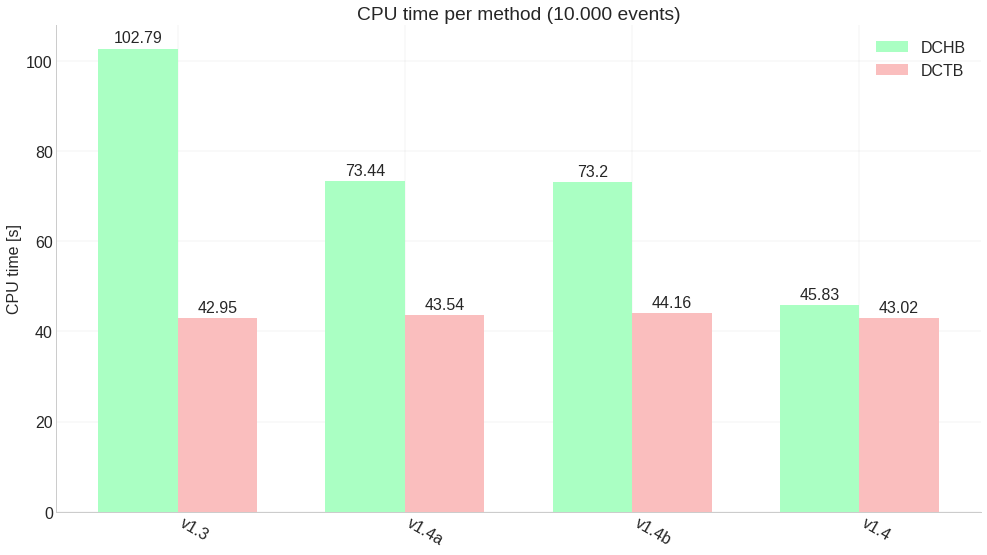

In [21]:
# times:
DCHB_times = [102.79, 73.44, 73.20, 45.83]
DCTB_times = [ 42.95, 43.54, 44.16, 43.02]
versions   = ["v1.3", "v1.4a", "v1.4b", "v1.4"]
engines    = ["DCHB", "DCTB"]

methods_contrast_plot(versions, (DCHB_times, DCTB_times), (grad_4_gre[::-1], grad_4_red[::-1]), engines, False)

### Final Times per Method and per Engines separately (Concluding Remarks)

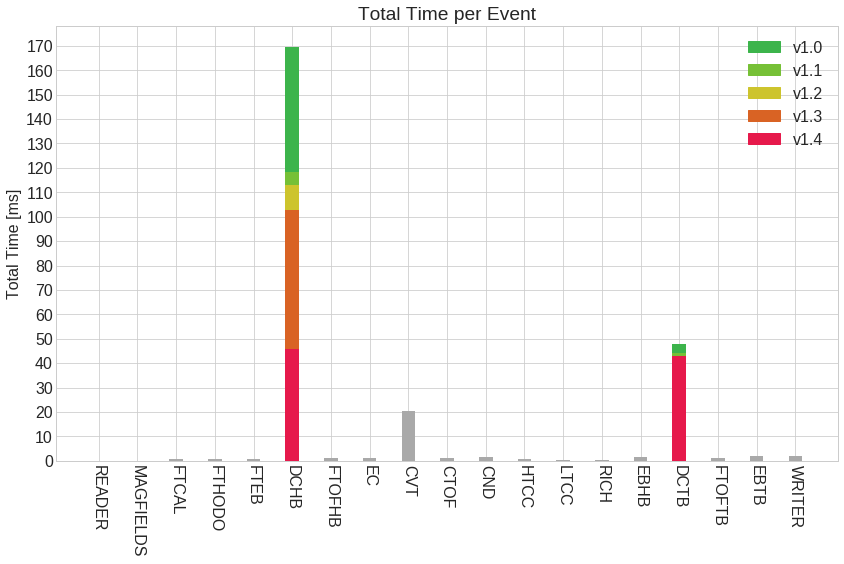

In [21]:
width = 0.35

engines = [
    "READER"    , "MAGFIELDS" , "FTCAL"     , "FTHODO"    ,
    "FTEB"      , "DCHB"      , "FTOFHB"    , "EC"        ,
    "CVT"       , "CTOF"      , "CND"       , "HTCC"      ,
    "LTCC"      , "RICH"      , "EBHB"      , "DCTB"      ,
    "FTOFTB"    , "EBTB"      , "WRITER"
]
versions = ["v1.0", "v1.1", "v1.2", "v1.3", "v1.4"]

N = len(engines)
v1_0 = np.array([0.04, 0.01, 0.90, 0.87, 0.64, 169.68, 1.15, 1.00, 20.35, 1.25, 1.58, 0.57, 0.30, 0.14, 1.63, 47.76, 1.18, 1.83, 1.89])
v1_1 = np.array([0.04, 0.01, 0.90, 0.87, 0.64, 118.14, 1.15, 1.00, 20.35, 1.25, 1.58, 0.57, 0.30, 0.14, 1.63, 44.34, 1.18, 1.83, 1.89])
v1_2 = np.array([0.04, 0.01, 0.90, 0.87, 0.64, 113.19, 1.15, 1.00, 20.35, 1.25, 1.58, 0.57, 0.30, 0.14, 1.63, 42.93, 1.18, 1.83, 1.89])
v1_3 = np.array([0.04, 0.01, 0.90, 0.87, 0.64, 102.79, 1.15, 1.00, 20.35, 1.25, 1.58, 0.57, 0.30, 0.14, 1.63, 42.95, 1.18, 1.83, 1.89])
v1_4 = np.array([0.04, 0.01, 0.90, 0.87, 0.64,  45.83, 1.15, 1.00, 20.35, 1.25, 1.58, 0.57, 0.30, 0.14, 1.63, 43.02, 1.18, 1.83, 1.89])

c1_0 = [c_gra, c_gra, c_gra, c_gra, c_gra,     c_gre, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra,     c_gre, c_gra, c_gra, c_gra]
c1_1 = [c_gra, c_gra, c_gra, c_gra, c_gra, "#76c036", c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, "#76c036", c_gra, c_gra, c_gra]
c1_2 = [c_gra, c_gra, c_gra, c_gra, c_gra, "#cdc42d", c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, "#cdc42d", c_gra, c_gra, c_gra]
c1_3 = [c_gra, c_gra, c_gra, c_gra, c_gra, "#d96324", c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, "#d96324", c_gra, c_gra, c_gra]
c1_4 = [c_gra, c_gra, c_gra, c_gra, c_gra,     c_red, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra, c_gra,     c_red, c_gra, c_gra, c_gra]

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)

ind = np.arange(N)

plots = []
plots.append(plt.bar(ind, v1_4, width, color=c1_4))
plots.append(plt.bar(ind, v1_3-v1_4, width, bottom=v1_4, color=c1_3))
plots.append(plt.bar(ind, v1_2-v1_3, width, bottom=v1_3, color=c1_2))
plots.append(plt.bar(ind, v1_1-v1_2, width, bottom=v1_2, color=c1_1))
plots.append(plt.bar(ind, v1_0-v1_1, width, bottom=v1_1, color=c1_0))

plt.ylabel("Total Time [ms]")
plt.title("Total Time per Event")
plt.xticks(ind, engines, rotation=-90)
plt.yticks(np.arange(0, 171, 10))

patches = []
patches.append(mpatches.Patch(color=c_gre, label="v1.0"))
patches.append(mpatches.Patch(color="#76c036", label="v1.1"))
patches.append(mpatches.Patch(color="#cdc42d", label="v1.2"))
patches.append(mpatches.Patch(color="#d96324", label="v1.3"))
patches.append(mpatches.Patch(color=c_red, label="v1.4"))
plt.legend(handles=patches)

plt.show()
